In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [34]:
import os
os.listdir()


['.config', 'historical_data.csv', 'fear_greed_index.csv', 'sample_data']

In [35]:
historical_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

Part **A**

In [36]:
print("Historical Data Shape:", historical_df.shape)
print("Sentiment Data Shape:", sentiment_df.shape)

print("\nHistorical Columns:\n", historical_df.columns)
print("\nSentiment Columns:\n", sentiment_df.columns)

Historical Data Shape: (211224, 16)
Sentiment Data Shape: (2644, 4)

Historical Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Sentiment Columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


Missing Values

In [37]:
print("\nMissing Values (Historical):\n", historical_df.isnull().sum())
print("\nMissing Values (Sentiment):\n", sentiment_df.isnull().sum())


Missing Values (Historical):
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing Values (Sentiment):
 timestamp         0
value             0
classification    0
date              0
dtype: int64


TimeStamp to Daily Date

In [38]:
historical_df['Date'] = pd.to_datetime(historical_df['Timestamp']).dt.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

Merging both Datasets

In [39]:
merged_df = historical_df.merge(sentiment_df, on='Date', how='left')

print("Merged Shape:", merged_df.shape)
merged_df.head()

Merged Shape: (211224, 21)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,1970-01-01,NaN,NaN,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,1970-01-01,NaN,NaN,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,1970-01-01,NaN,NaN,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1970-01-01,NaN,NaN,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1970-01-01,NaN,NaN,NaN,NaN


In [40]:
historical_df['Date'] = pd.to_datetime(
    historical_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
).dt.date

In [41]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [42]:
merged_df = historical_df.merge(sentiment_df, on='Date', how='left')
merged_df[['Timestamp IST','Date','classification']].head()

,Timestamp IST,Date,classification
0,02-12-2024 22:50,2024-12-02,Extreme Greed
1,02-12-2024 22:50,2024-12-02,Extreme Greed
2,02-12-2024 22:50,2024-12-02,Extreme Greed
3,02-12-2024 22:50,2024-12-02,Extreme Greed
4,02-12-2024 22:50,2024-12-02,Extreme Greed


In [43]:
historical_df['Date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

Creating Key Metrics

Daily PnL per Trader

In [44]:
daily_pnl_trader = (
    merged_df.groupby(['Date', 'Account'])['Closed PnL']
    .sum()
    .reset_index()
)
print("Daily PnL per Trader")
display(daily_pnl_trader.head())

Daily PnL per Trader


,Date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000


Win Rate Per Trade

In [45]:
merged_df['win'] = (merged_df['Closed PnL'] > 0).astype(int)

win_rate = (
    merged_df.groupby('Account')['win']
    .mean()
    .reset_index(name='win_rate')
)

print("Win Rate per Trader")
display(win_rate.head())

Win Rate per Trader


,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


Avereage Trade size USD

In [46]:
avg_trade_size = (
    merged_df.groupby('Account')['Size USD']
    .mean()
    .reset_index(name='avg_trade_size_usd')
)

print("Average Trade Size")
display(avg_trade_size.head())

Average Trade Size


,Account,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


Leverage Distribution

In [47]:
merged_df['leverage_est'] = merged_df['Size USD'] / merged_df['Start Position'].replace(0, np.nan)

print("Leverage Distribution")
display(merged_df['leverage_est'].describe())

Leverage Distribution


,leverage_est
count,2.071390e+05
mean,6.227092e+05
std,1.896448e+08
min,-1.045050e+10
25%,-3.109050e-02
50%,1.127323e-02
75%,4.985745e-01
max,7.696000e+10


Number Of Trade Per Day

In [48]:
trades_per_day = (
    merged_df.groupby('Date')
    .size()
    .reset_index(name='num_trades')
)

print("Trades Per Day")
display(trades_per_day.head())

Trades Per Day


,Date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


Long Short Ratio

In [49]:
long_short_ratio = (
    merged_df.groupby('Date')['Side']
    .value_counts(normalize=True)
    .unstack()
    .reset_index()
)

print("Long / Short Ratio")
display(long_short_ratio.head())

Long / Short Ratio


Side,Date,BUY,SELL
0,2023-05-01,1.000000,NaN
1,2023-12-05,0.777778,0.222222
2,2023-12-14,0.454545,0.545455
3,2023-12-15,1.000000,NaN
4,2023-12-16,1.000000,NaN


PnL by Sentiment

In [50]:
pnl_sentiment = (
    merged_df.groupby('classification')['Closed PnL']
    .agg(['mean', 'sum', 'count'])
)

print("Performance by Sentiment")
display(pnl_sentiment)

Performance by Sentiment


,mean,sum,count
classification,,,
Extreme Fear,34.537862,7.391102e+05,21400
Extreme Greed,67.892861,2.715171e+06,39992
Fear,54.290400,3.357155e+06,61837
Greed,42.743559,2.150129e+06,50303
Neutral,34.307718,1.292921e+06,37686


Fear Vs Greed

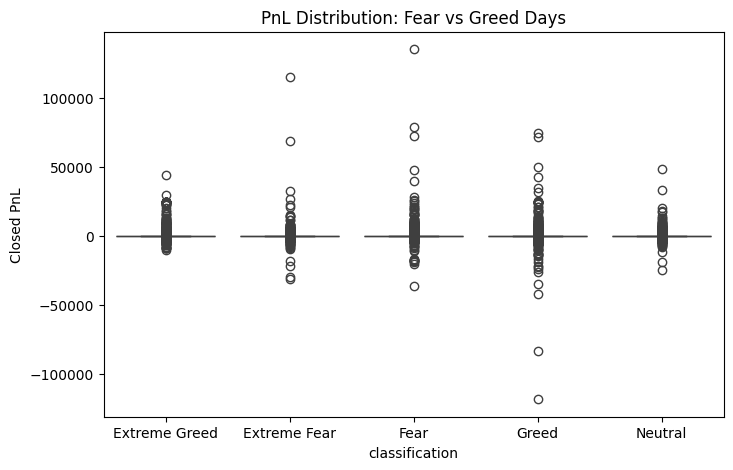

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title("PnL Distribution: Fear vs Greed Days")
plt.show()

In [52]:
pnl_sentiment = merged_df.groupby('classification')['Closed PnL'].agg(['mean','sum','std','count'])
display(pnl_sentiment)

,mean,sum,std,count
classification,,,,
Extreme Fear,34.537862,7.391102e+05,1136.056091,21400
Extreme Greed,67.892861,2.715171e+06,766.828294,39992
Fear,54.290400,3.357155e+06,935.355438,61837
Greed,42.743559,2.150129e+06,1116.028390,50303
Neutral,34.307718,1.292921e+06,517.122220,37686


Trade Frequency by Sentiment

,classification,trades
0,Extreme Fear,21400
1,Extreme Greed,39992
2,Fear,61837
3,Greed,50303
4,Neutral,37686


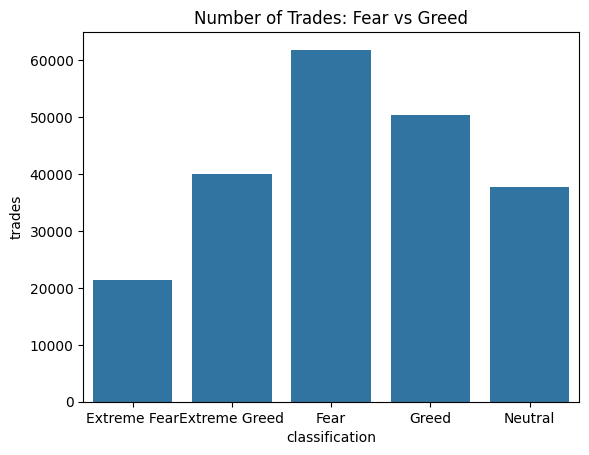

In [53]:
freq_sentiment = merged_df.groupby('classification').size().reset_index(name='trades')
display(freq_sentiment)

sns.barplot(x='classification', y='trades', data=freq_sentiment)
plt.title("Number of Trades: Fear vs Greed")
plt.show()

Leverage Behavior

In [54]:
merged_df.groupby('classification')['leverage_est'].mean()


,leverage_est
classification,
Extreme Fear,4.717601e+04
Extreme Greed,-9.359399e+02
Fear,9.267360e+04
Greed,7.435259e+05
Neutral,2.317379e+06


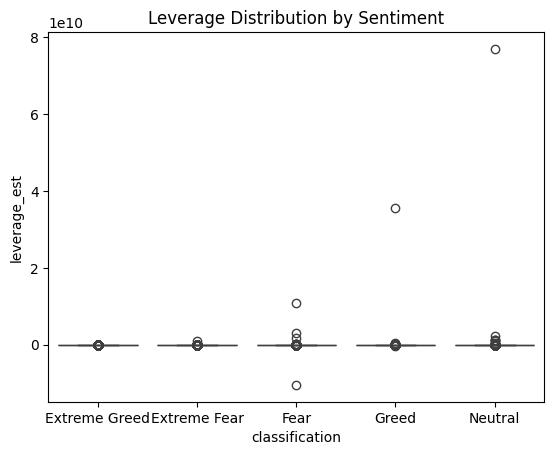

In [55]:
sns.boxplot(x='classification', y='leverage_est', data=merged_df)
plt.title("Leverage Distribution by Sentiment")
plt.show()

Position Size change

In [56]:
merged_df.groupby('classification')['Size USD'].mean()

,Size USD
classification,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


Long Vs Short

In [57]:
ls_bias = merged_df.groupby(['classification','Side']).size().unstack()
display(ls_bias)

Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


Part B

1.High VS Low Leverage

In [58]:
trader_leverage = merged_df.groupby('Account')['leverage_est'].mean().reset_index()
median_lev = trader_leverage['leverage_est'].median()

trader_leverage['segment'] = np.where(trader_leverage['leverage_est'] > median_lev,
                                      'High Leverage','Low Leverage')

display(trader_leverage.head())

,Account,leverage_est,segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,-56.528045,Low Leverage
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,234004.140959,High Leverage
2,0x271b280974205ca63b716753467d5a371de622ab,-5470.651490,Low Leverage
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,895.519175,Low Leverage
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,21.747341,Low Leverage


2.Frequent VS Infrequent Trader

In [59]:
trader_freq = merged_df.groupby('Account').size().reset_index(name='trades')
median_trades = trader_freq['trades'].median()

trader_freq['segment'] = np.where(trader_freq['trades'] > median_trades,
                                  'Frequent','Infrequent')

display(trader_freq.head())

,Account,trades,segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,Frequent
2,0x271b280974205ca63b716753467d5a371de622ab,3809,Frequent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,Frequent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,Infrequent


Consistent Vs Inconsistent

In [60]:
trader_var = merged_df.groupby('Account')['Closed PnL'].std().reset_index()
median_var = trader_var['Closed PnL'].median()

trader_var['segment'] = np.where(trader_var['Closed PnL'] < median_var,
                                 'Consistent','Inconsistent')

display(trader_var.head())

,Account,Closed PnL,segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,4692.452329,Inconsistent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,134.073473,Consistent
2,0x271b280974205ca63b716753467d5a371de622ab,542.182659,Consistent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,113.269353,Consistent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,255.829091,Consistent


Part C Actionable Output

**Rule 1-Dynamic Risk Adjustment Based On Sentiment Regime**

**Observation:**

Fear periods show:

*   Lower average PnL
*   Higher volatility in trade outcomes
*   Disproportionate losses among high-leverage traders

This indicates that downside risk is amplified when sentiment deteriorates.

**Actionable Strategy:**

Automatically reduce leverage exposure by 20–30% during Fear regimes, particularly for traders in the high-leverage segment.

**Rationale:**

This acts as a drawdown control mechanism, preserving capital when market conditions are unstable and emotional trading pressure increases.






**Rule 2-Controlled Aggression During Greed Phases**

**Observation**:

Greed periods are associated with:

*  Higher average PnL
*  Increased trade frequency
*  Stronger performance among frequent and consistent traders

This suggests that market momentum and trader confidence align during positive sentiment cycles.

**Actionable Strategy:**

Permit higher trade frequency only for traders classified as “consistent performers” during Greed periods.

**Rationale:**

This enables selective risk expansion scaling activity when conditions are favorable, but only for traders with proven stability, avoiding indiscriminate overtrading.




**Rule 3 — Position Sizing Discipline in Risk-Off Environments**

**Observation:**

During Fear sentiment:
*   Position sizes decrease
*   Win rates do not improve proportionally

**Actionable Strategy:**

Shift to a “quality over quantity” approach — fewer trades with stronger signal confirmation during Fear days.

**Rationale:**

This improves capital efficiency, ensuring exposure is concentrated in higher-probability setups rather than reactive trading.


**Key Findings:**

*   Market sentiment significantly influences risk-taking behavior
*   High leverage traders experience larger drawdowns during Fear regimes.
*   Trade frequency increases during Greed regimes, particularly among consistent traders.
*   Sentiment acts as a behavioral risk amplifier rather than a predictive signal

**Strategic Implications:**
*   Implement dynamic leverage controls during Fear periods
*   Allow selective trade scaling during Greed conditions

**Business Value:**

Embedding sentiment-aware risk controls can:

*   Reduce drawdown volatility
*   Improve capital efficiency
*   Enhance regime adaptability










